## OpenCV로 윤곽 검출
- `findContours()` : 윤곽 검출
- `GaussianBlur()` : 이미지 흐리게
- `threshold()` : 이진화

### 순서
1. 이미지 읽기
2. 이미지 이진화
3. 윤곽 검출

97 64 30 28
101 9 90 81


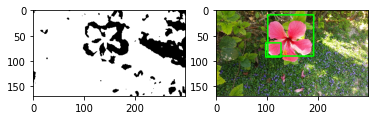

In [3]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('../datasets/flower.jpg')
img = cv2.resize(img, (300, 169))

# 색공간 변경
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.GaussianBlur(gray, (7, 7), 0)
im2 = cv2.threshold(gray, 140, 240, cv2.THRESH_BINARY_INV)[1]

# 이미지 출력
plt.subplot(1, 2, 1)
plt.imshow(im2, cmap='gray')

# 윤곽 검출
cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

# 검출한 윤곽 그리기
for pt in cnts:
    x, y, w, h = cv2.boundingRect(pt)
    
    # 너무 크거나 작은 부분 제거
    if w < 30 or w > 200 : continue
    print(x, y, w, h)
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

### 이미지 블러 처리
- `cv2.blur()`, `cv2.medianBlur()`, `cv2.bilateralFilter()` 등 다양함
- 그 중 가우시안 필터를 화이트 노이즈 제거에 많이 사용
- `img = cv2.GaussianBlur(img, (ax, ay), sigma_x)`
    - `(ax, ay)` : 블러 처리를 적용할 화소 크기를 픽셀 단위로 지정 (반드시 홀수 지정)
    - `sigma_x` : 가로 방향 표준 편차, 0으로 주면 이미지 크기에 맞게 자동 할당

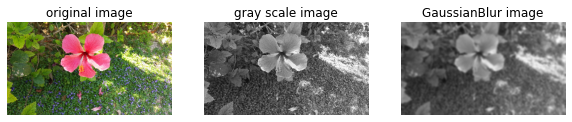

In [15]:
img = cv2.imread('../datasets/flower.jpg')
img = cv2.resize(img, (300, 169))

plt.figure(figsize=(10, 6))


plt.subplot(1, 3, 1)
plt.axis('off')
plt.title('original image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

plt.subplot(1, 3, 2)
plt.axis('off')
plt.title('gray scale image')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

plt.subplot(1, 3, 3)
plt.axis('off')
plt.title('GaussianBlur image')
gray = cv2.GaussianBlur(gray, (7, 7), 0)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.show()

### 이미지 이진화
- `ret, img = cv2.threshold(img, thresh, maxval, type)`
    - `thresh` : 역치 값 지정
    - `maxval` : 역치 값 이상의 값에 설정할 값
    - `type` : `THRESH_BINARY_INV`=역치 값보다 크면 0(검은색), 아니면 maxval(흰색 등) 할당

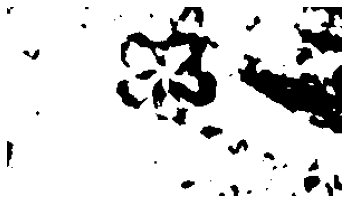

In [18]:
im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
plt.axis('off')
plt.imshow(cv2.cvtColor(im2, cv2.COLOR_GRAY2RGB))
plt.show()

### 윤곽 검출
- `contours, hierarchy = cv2.findContours(image, mode, method)` : 반환 값 = 윤곽 리스트, 계층 정보
    - `mode` : 윤곽 검출 모드
        - `cv2.RETR_LIST` : 단순한 윤곽 검출
        - `cv2.RETR_EXTERNAL` : 가장 외곽에 있는 윤곽만 검출
        - `cv2.RETR_CCOMP` : 계층을 고려해 2레벨 윤곽을 검출
        - `cv2.RETR_TREE` : 모든 윤곽을 검출하고 계층 구조로 저장
    - `method` : 윤곽 추출 방법
        - `cv2.CHAIN_APPROX_NONE` : 윤곽 위 모든 점 반환
        - `cv2.CHAIN_APPROX_SIMPLE` : 의미 없는 정보를 제거하고 반환

In [29]:
def get_contours(mode):
    # 윤곽 검출
    cnts = cv2.findContours(im2, mode, cv2.CHAIN_APPROX_SIMPLE)[0]
    img2 = img.copy()
    # 검출한 윤곽 그리기
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)

        cv2.rectangle(img2, (x, y), (x+w, y+h), (0, 255, 0), 2)
    return img2

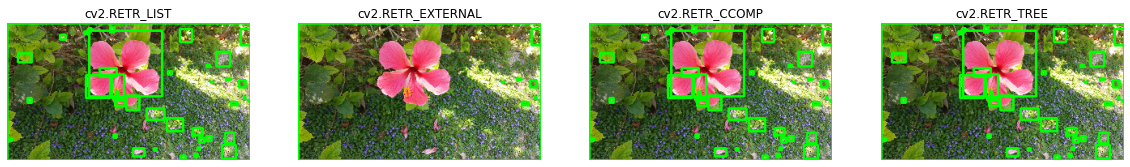

In [31]:
modes = [cv2.RETR_LIST, cv2.RETR_EXTERNAL, cv2.RETR_CCOMP, cv2.RETR_TREE]
titles = ['cv2.RETR_LIST', 'cv2.RETR_EXTERNAL', 'cv2.RETR_CCOMP', 'cv2.RETR_TREE']
plt.figure(figsize=(20, 12))
for i, mode in enumerate(modes):
    img2 = get_contours(mode)
    plt.subplot(1, 4, i+1)
    plt.axis('off')
    plt.title(titles[i])
    plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))
plt.show()

## 엽서에서 우편 번호 영역 검출하기

In [34]:
import cv2
import matplotlib.pyplot as plt

# 이미지로부터 우편번호 추출
def detect_zipno(fname):
    img = cv2.imread(fname)
    
    # 이미지 크기
    h, w = img.shape[:2]
    
    # 이미지의 오른쪽 윗부분만 추출
    img = img[:h//2, w//3:]
    
    # 이미지 이진화
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    im2 = cv2.threshold(gray, 140, 255, cv2.THRESH_BINARY_INV)[1]
    
    # 윤곽 검출
    cnts = cv2.findContours(im2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
    
    # 윤곽 추출
    result = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        
        # 너무 작거나 큰 부분 제거
        if not (50 < w < 70): continue
        result.append([x, y, w, h])
    
    # 추출한 윤곽을 위치에 따라 정렬
    result = sorted(result, key=lambda x:x[0])
    
    # 추출한 윤곽이 너무 가까운 것들 제거
    result2 = []
    lastx = -100
    for x, y, w, h in result:
        if (x - lastx) < 10:continue
        result2.append([x, y, w, h])
        lastx = x
    
    # 테두리 출력
    for x, y, w, h in result2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 3)
    
    return result2, img

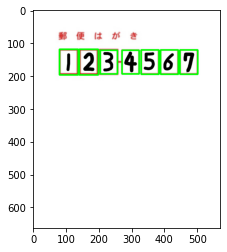

In [35]:
if __name__ == '__main__':
    cnts, img = detect_zipno('../datasets/hagaki1.png')
    
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.show()

## 추출한 숫자 이미지 판정하기
- 앞서 만든 detect_zipno 함수는 `detect_zip.py`에 저장

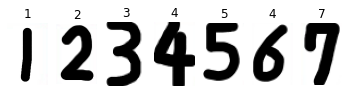

In [37]:
from detect_zip import *
import matplotlib.pyplot as plt
import joblib

clf = joblib.load('../models/digits.pkl')

cnts, img = detect_zipno('../datasets/hagaki1.png')

# 읽어들인 데이터 출력
for i, pt in enumerate(cnts):
    x, y, w, h = pt
    # 윤곽으로 감싼 부분을 작게 만들기
    x += 8
    y += 8
    w -= 16
    h -= 16
    
    # 이미지 데이터 추출
    im2 = img[y:y+h, x:x+w]
    
    # 학습에 적합하게 변환
    im2gray = cv2.cvtColor(im2, cv2.COLOR_BGR2GRAY) # 그레이스케일
    im2gray = cv2.resize(im2gray, (8, 8)) # 크기 변경
    im2gray = 15 - im2gray // 16 # 이진화
    im2gray = im2gray.reshape((-1, 64)) # 차원 변환
    
    # 데이터 예측
    res = clf.predict(im2gray)
    
    # 출력
    plt.subplot(1, 7, i+1)
    plt.imshow(im2)
    plt.axis('off')
    plt.title(res[0])

plt.show()

### 평가
- 6을 4로 인식
- 학습 데이터가 적음, 문자가 너무 크거나 작음, 두께가 얇음 등의 문제